In [2]:
import os
import cPickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-paper')
plt.rc('text', usetex=False)

import warnings
warnings.filterwarnings('ignore')

In [36]:
# Training
dfx = pd.read_csv('../../scripts/aism/dataset_12-2017/data_training.csv', header=0, index_col=0)
dfy = pd.read_csv('../../scripts/aism/dataset_12-2017/labels_training.csv', header=0, index_col=0)
yy = np.where(dfy.values == 'SP', 1, 0)  # map RR - SP / 0 - 1
dfy = pd.DataFrame(data=yy, index=dfy.index, columns=dfy.columns)

In [37]:
# Validation
dfx_valid = pd.read_csv('../../scripts/aism/dataset_12-2017/data_valid.csv', header=0, index_col=0)
dfy_valid = pd.read_csv('../../scripts/aism/dataset_12-2017/labels_valid.csv', header=0, index_col=0)
yy = np.where(dfy_valid.values == 'SP', 1, 0)  # map RR - SP / 0 - 1
dfy_valid = pd.DataFrame(data=yy, index=dfy_valid.index, columns=dfy_valid.columns)

In [38]:
# Test
dfx_test = pd.read_csv('../../scripts/aism/dataset_12-2017/data_test.csv', header=0, index_col=0)
dfy_test = pd.read_csv('../../scripts/aism/dataset_12-2017/labels_test.csv', header=0, index_col=0)
yy = np.where(dfy_test.values == 'SP', 1, 0)  # map RR - SP / 0 - 1
dfy_test = pd.DataFrame(data=yy, index=dfy_test.index, columns=dfy_test.columns)

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

ss = StratifiedShuffleSplit(n_splits=1, test_size=0.25)
idx_train, idx_test = next(ss.split(dfx.values, dfy.values))

x_train, y_train = dfx.iloc[idx_train], dfy.iloc[idx_train]
x_test, y_test = dfx.iloc[idx_test], dfy.iloc[idx_test]

In [18]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier

max_n_estimators = 500
n_estimators_range = np.arange(1, max_n_estimators)

rf = GradientBoostingClassifier(learning_rate=0.05)

test_ACC = []
train_ACC = []

for n_estimators in n_estimators_range:
    print('{} estimators'.format(n_estimators))
    rf.set_params(n_estimators=n_estimators)
    rf.fit(x_train.values, y_train.values)
    y_pred = rf.predict(x_test.values)
    y_pred_tr = rf.predict(x_train.values)
    
    test_ACC.append(metrics.accuracy_score(y_test, y_pred))
    train_ACC.append(metrics.accuracy_score(y_train, y_pred_tr))

1 estimators
2 estimators
3 estimators
4 estimators
5 estimators
6 estimators
7 estimators
8 estimators
9 estimators
10 estimators
11 estimators
12 estimators
13 estimators
14 estimators
15 estimators
16 estimators
17 estimators
18 estimators
19 estimators
20 estimators
21 estimators
22 estimators
23 estimators
24 estimators
25 estimators
26 estimators
27 estimators
28 estimators
29 estimators
30 estimators
31 estimators
32 estimators
33 estimators
34 estimators
35 estimators
36 estimators
37 estimators
38 estimators
39 estimators
40 estimators
41 estimators
42 estimators
43 estimators
44 estimators
45 estimators
46 estimators
47 estimators
48 estimators
49 estimators
50 estimators
51 estimators
52 estimators
53 estimators
54 estimators
55 estimators
56 estimators
57 estimators
58 estimators
59 estimators
60 estimators
61 estimators
62 estimators
63 estimators
64 estimators
65 estimators
66 estimators
67 estimators
68 estimators
69 estimators
70 estimators
71 estimators
72 estimators
7

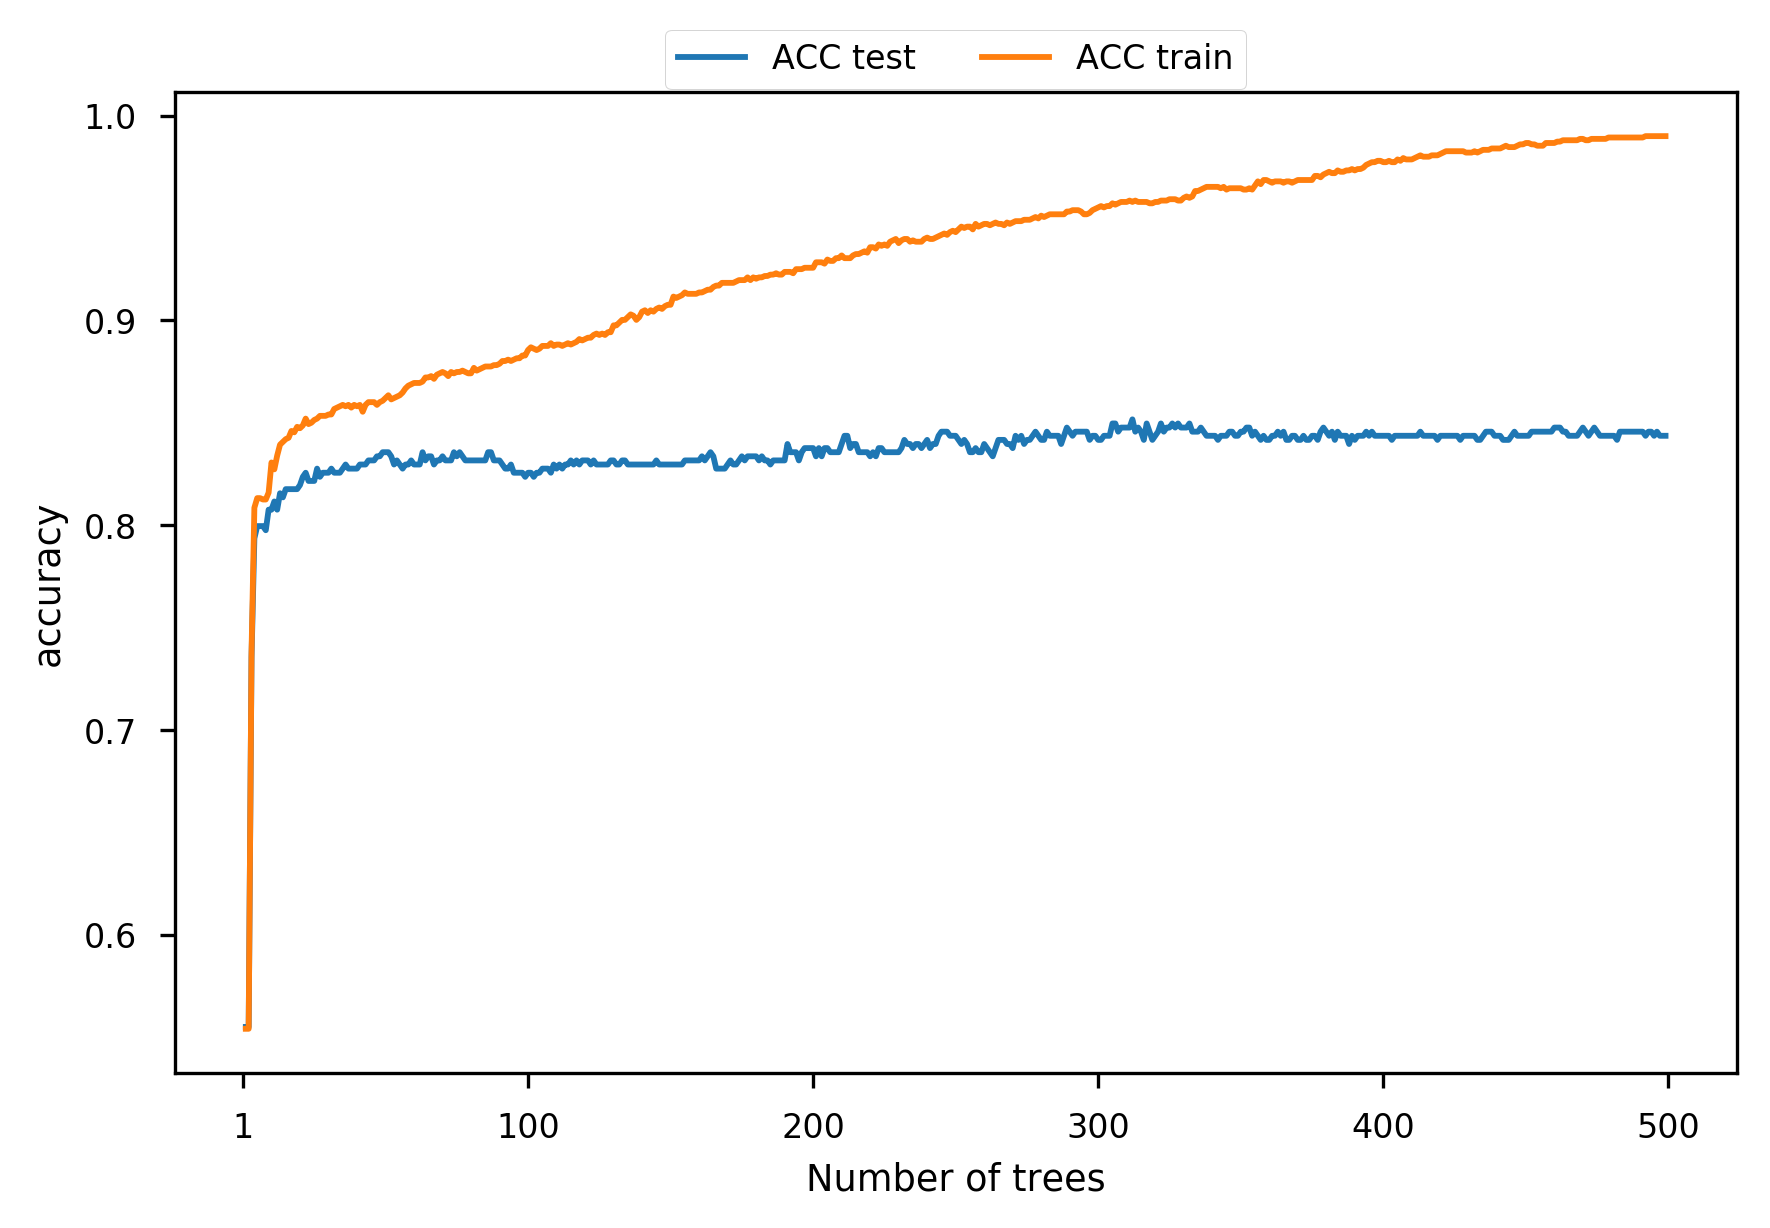

In [19]:
plt.figure(dpi=300)

plt.plot(n_estimators_range, test_ACC, color='C0', label='ACC test')
plt.plot(n_estimators_range, train_ACC, color='C1', label='ACC train')

plt.xticks([0, 100, 200, 300, 400, 500], [1, 100, 200, 300, 400, 500])
plt.xlabel('Number of trees')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08),
          ncol=3, fancybox=True, shadow=False)
plt.ylabel('accuracy')

plt.tight_layout()

In [32]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(train_sizes, train_scores, test_scores,
                        title='title', ylabel='score', dpi=200):
    """Generate a simple plot of the test and training learning curve."""
    plt.figure(dpi=dpi)
    plt.title(title)
    plt.xlabel("# Training examples")
    plt.ylabel(ylabel)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="orange")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="royalblue")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="orange",
             label="Training acc")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="royalblue",
             label="Cross-validation acc")

    plt.legend(loc="best")
    return plt

In [48]:
# Concat all together
xx = pd.concat([dfx, dfx_valid, dfx_test])
yy = pd.concat([dfy, dfy_valid, dfy_test])

In [64]:
train_sizes, train_scores, test_scores = learning_curve(
    GradientBoostingClassifier(learning_rate=0.05, n_estimators=200), xx, yy,
    cv=StratifiedShuffleSplit(n_splits=5, test_size=0.25), n_jobs=-1,
    train_sizes=np.linspace(0.01, 1, 20),
    scoring='accuracy')

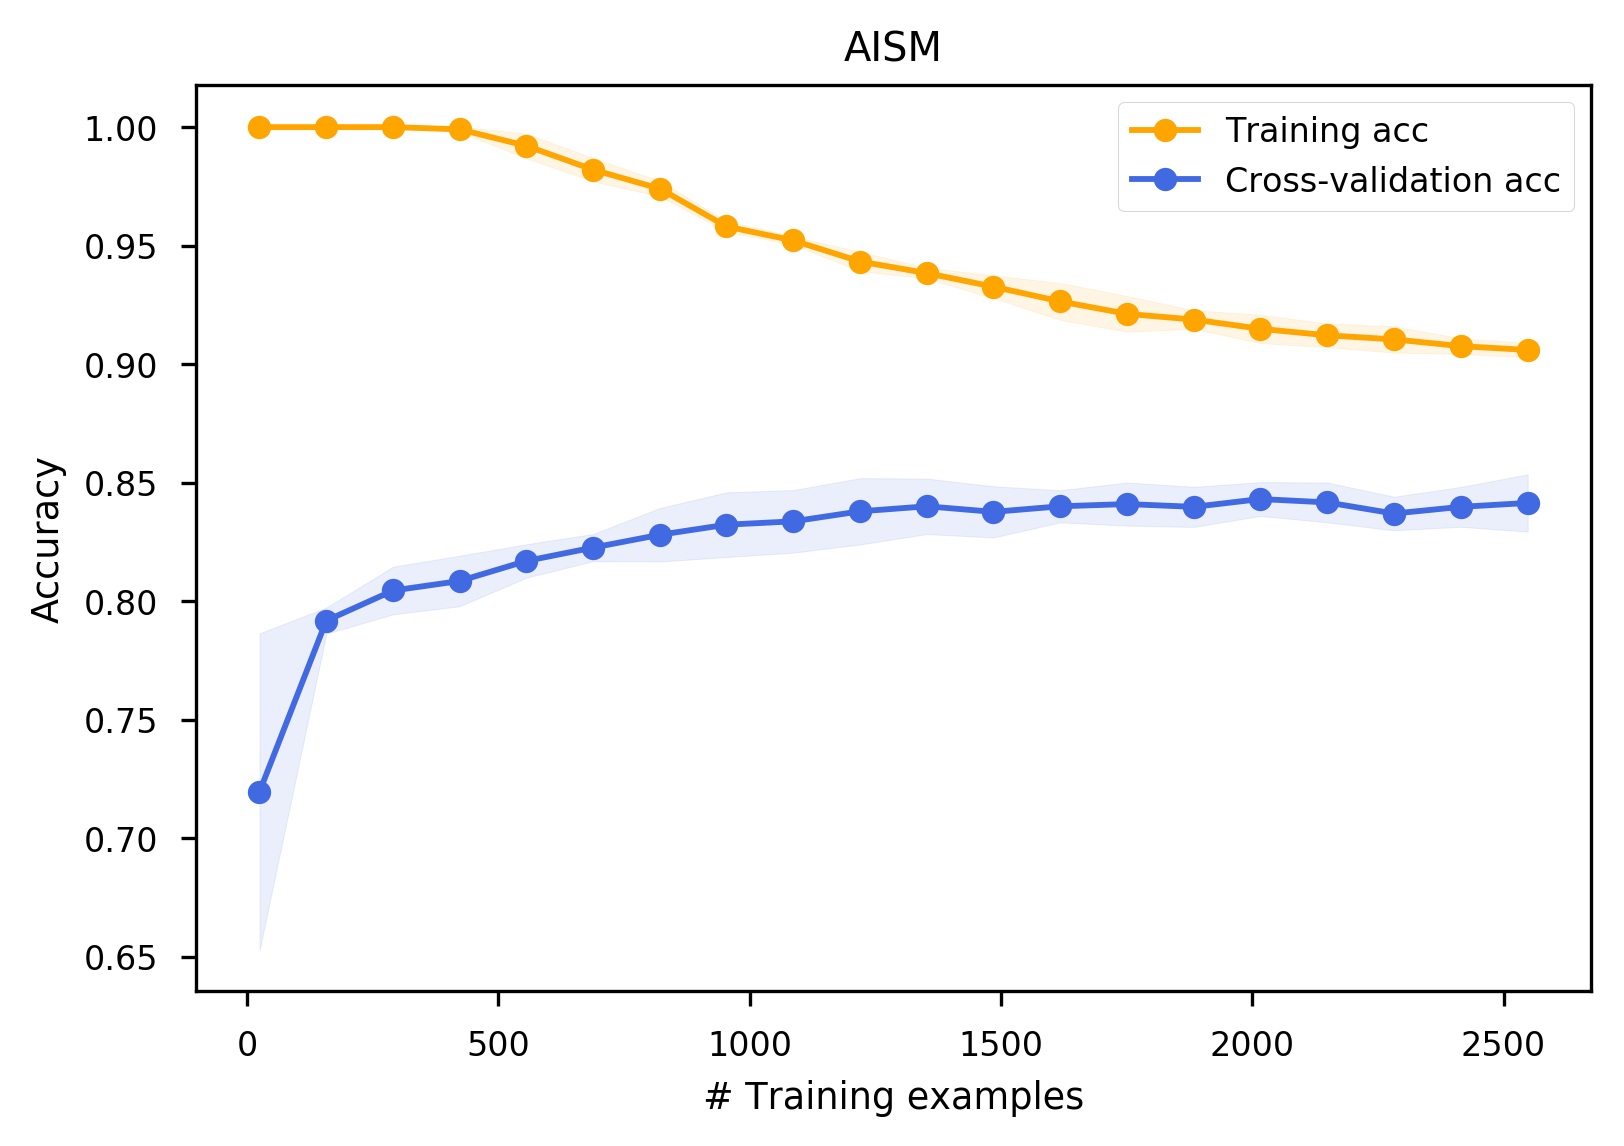

In [65]:
plt = plot_learning_curve(train_sizes, train_scores, test_scores, 'AISM', 'Accuracy', 300)